# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy import stats

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/MSc SEM-2/car_price_prediction/car_price_prediction.csv')

In [3]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


- Here in ***Levy*** column the ***null*** values entered as ***'-'*** so we had to change them to null values. We will handle this problem soon. 

In [4]:
df.shape

(19237, 18)

In [5]:
df.isnull().sum().to_frame()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [6]:
for col in df.columns:
    print(col)
    print(df[f'{col}'].unique())
    print('*'*125)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
*****************************************************************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
*****************************************************************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247'

In [7]:
df[df["Levy"]=="-"]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


- As I mentioned earlier we had the **'-'** values in the Levy column which used instead of null values. We have ***5819*** of them! We will replace them with null for now and will handle what to imput there later on.

In [8]:
df['Levy'].replace({'-':np.nan},inplace=True)
df['Levy'] = df['Levy'].astype('float64')

In [9]:
df["Leather interior"].replace({"Yes":1,"No":0},inplace=True)

In [10]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [11]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

# Finding the rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo'] = df['Engine volume'].str.contains('turbo')

df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


In [12]:
df['Engine volume'] = df['Engine volume'].str.slice(0,3)      # Slices the column and retrieves first three values
df['Engine volume'] = df['Engine volume'].astype('float64')


In [13]:
df[df["Turbo"]==True].head(10)

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
23,45814106,7840,NaN,FORD,Transit,2001,Microbus,0,Diesel,2.0,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0,True
25,45782859,20385,NaN,MERCEDES-BENZ,E 220,2006,Sedan,1,Diesel,2.2,210000 km,4.0,Tiptronic,Rear,04-May,Left wheel,Black,8,True
30,44944581,15681,1288.0,MERCEDES-BENZ,Vito,2007,Goods wagon,0,Diesel,2.0,180000 km,6.0,Manual,Rear,04-May,Left wheel,White,4,True
34,45542380,24462,NaN,JEEP,Grand Cherokee,2007,Jeep,1,Diesel,3.0,250000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,10,True
42,45667253,20165,650.0,VOLKSWAGEN,Jetta,2016,Sedan,1,Petrol,1.4,11200 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,8,True
52,45802148,14583,NaN,RENAULT,Megane 1.5CDI,2008,Sedan,0,Diesel,1.5,132542 km,4.0,Manual,Front,04-May,Left wheel,White,10,True
56,44316016,87112,NaN,MERCEDES-BENZ,GLA 250,2019,Jeep,1,Petrol,2.0,5323 km,4.0,Tiptronic,4x4,04-May,Left wheel,Grey,0,True
59,44679525,23521,781.0,CHEVROLET,Cruze LT,2018,Sedan,0,Petrol,1.4,22000 km,4.0,Automatic,Front,04-May,Left wheel,Red,6,True
60,45418626,16935,530.0,FORD,Fusion,2013,Sedan,0,Petrol,1.6,83000 km,4.0,Tiptronic,Front,04-May,Left wheel,Silver,8,True
75,45624039,42337,NaN,FORD,Mustang,2016,Cabriolet,1,Petrol,2.3,75000 km,4.0,Tiptronic,Rear,02-Mar,Left wheel,Silver,6,True


In [14]:
df["Mileage"]=df["Mileage"].str.strip("km")
df["Mileage"]=df["Mileage"].astype("float")

In [15]:
df["Doors"].replace({'04-May':4, '02-Mar':2,'>5':5},inplace=True)


In [16]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [17]:
cars=df.drop("ID",axis=1)

In [18]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005.0,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000.0,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000.0,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966.0,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901.0,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [19]:
display(cars[cars.Price==cars.Price.max()])
display(cars[cars.Price<1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999.0,4.0,Manual,Front,2,Left wheel,Blue,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,1,Petrol,2.4,216118.0,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,1,Diesel,3.5,184467.0,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,549,1079.0,TOYOTA,CHR,2018,Jeep,1,Petrol,2.0,74146.0,4.0,Automatic,Front,4,Left wheel,White,12,False
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,1,Petrol,3.3,295059.0,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,941,1850.0,LEXUS,RX 400,2008,Jeep,1,Hybrid,3.5,364523.0,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,NaN,NISSAN,Note,2006,Hatchback,0,Petrol,1.3,0.0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,1,Diesel,3.5,122874.0,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,50,NaN,TOYOTA,Prius,2008,Hatchback,0,Hybrid,1.5,150000.0,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,1,Hybrid,1.8,307325.0,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [20]:
display(cars[cars.Mileage==cars.Mileage.max()])
display(cars[cars.Mileage<1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2278,6899,NaN,VOLKSWAGEN,Golf,1999,Sedan,0,Petrol,1.6,2.147484e+09,4.0,Manual,Front,4,Left wheel,Black,4,False
6157,5959,NaN,MERCEDES-BENZ,C 180,1995,Sedan,0,CNG,1.8,2.147484e+09,4.0,Manual,Rear,4,Left wheel,Blue,5,False
11901,10036,NaN,SUBARU,Forester,2005,Jeep,0,Petrol,2.0,2.147484e+09,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12734,2200,NaN,UAZ,31514,1968,Jeep,1,CNG,2.4,2.147484e+09,4.0,Manual,4x4,4,Left wheel,Black,10,False
15347,3,NaN,BMW,525,1995,Sedan,0,Petrol,2.8,2.147484e+09,6.0,Manual,Rear,4,Left wheel,Black,3,False
15393,15681,NaN,TOYOTA,Prius,2008,Sedan,0,Petrol,2.0,2.147484e+09,4.0,Automatic,Front,4,Left wheel,Blue,0,False
19167,18817,1995.0,FORD,Transit,2003,Microbus,0,Diesel,2.4,2.147484e+09,4.0,Manual,Front,2,Left wheel,White,2,True


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
11,8781,NaN,FORD,Transit,1999,Microbus,0,CNG,4.0,0.0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,4704,NaN,OPEL,Vectra,1995,Sedan,0,Petrol,1.8,0.0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,1,Petrol,4.7,0.0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,8154,NaN,HONDA,Cr-v,1998,Jeep,0,Petrol,2.0,0.0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,4234,NaN,HONDA,Civic,1997,Hatchback,1,Petrol,1.4,0.0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,NaN,BMW,320,1994,Sedan,1,Petrol,2.0,0.0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,2200,NaN,PEUGEOT,406,2001,Sedan,0,Petrol,2.0,0.0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,30,NaN,NISSAN,Tiida,2006,Hatchback,0,Petrol,1.5,0.0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,30,NaN,NISSAN,Note,2006,Hatchback,0,Petrol,1.3,0.0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


As a outlier detection algorithm, we will use **IQR calculation** and get rid of the values which is higher or lower than ***1.5 IQR.***

In [21]:
def outlier_detector(df,features,thold):
    outlier_indices=[]
    
    for c in features:
        #first Quartile 
        Q1=np.percentile(df[c],25)
        
        #third Quartile
        Q3=np.percentile(df[c],75)
        
        # IQR 
        IQR=Q3-Q1
        # Outlier Step
        outlier_step=IQR*thold
        
        # detect outliers and their indices
        outlier_list_col=df[(df[c]< Q1-outlier_step) | (df[c]> Q3+outlier_step)].index
        
        #Store indices
        outlier_indices.extend(outlier_list_col)
    
    return outlier_indices

In [22]:
features=["Price","Levy","Mileage"]
outliers=outlier_detector(cars,features,1.5)
cars_cleaned=cars.drop(cars.loc[outliers].index,axis=0)

In [23]:
cars_cleaned.shape

(17527, 18)

In [24]:
top10cars=cars_cleaned["Manufacturer"].value_counts().sort_values(ascending=False)[:10]
top10meanprices=[cars_cleaned[cars_cleaned["Manufacturer"]==i]["Price"].mean() for i in list(top10cars.index)]

In [25]:
top10cars

Manufacturer
TOYOTA           3392
HYUNDAI          3199
MERCEDES-BENZ    1840
CHEVROLET        1042
FORD             1032
BMW               943
HONDA             909
LEXUS             837
NISSAN            653
VOLKSWAGEN        572
Name: count, dtype: int64

In [26]:
top10meanprices

[12983.506191037735,
 19801.453579243513,
 12933.304891304348,
 13831.971209213052,
 12403.511627906977,
 15644.405090137858,
 11196.409240924093,
 11715.73715651135,
 10071.12404287902,
 11621.84090909091]

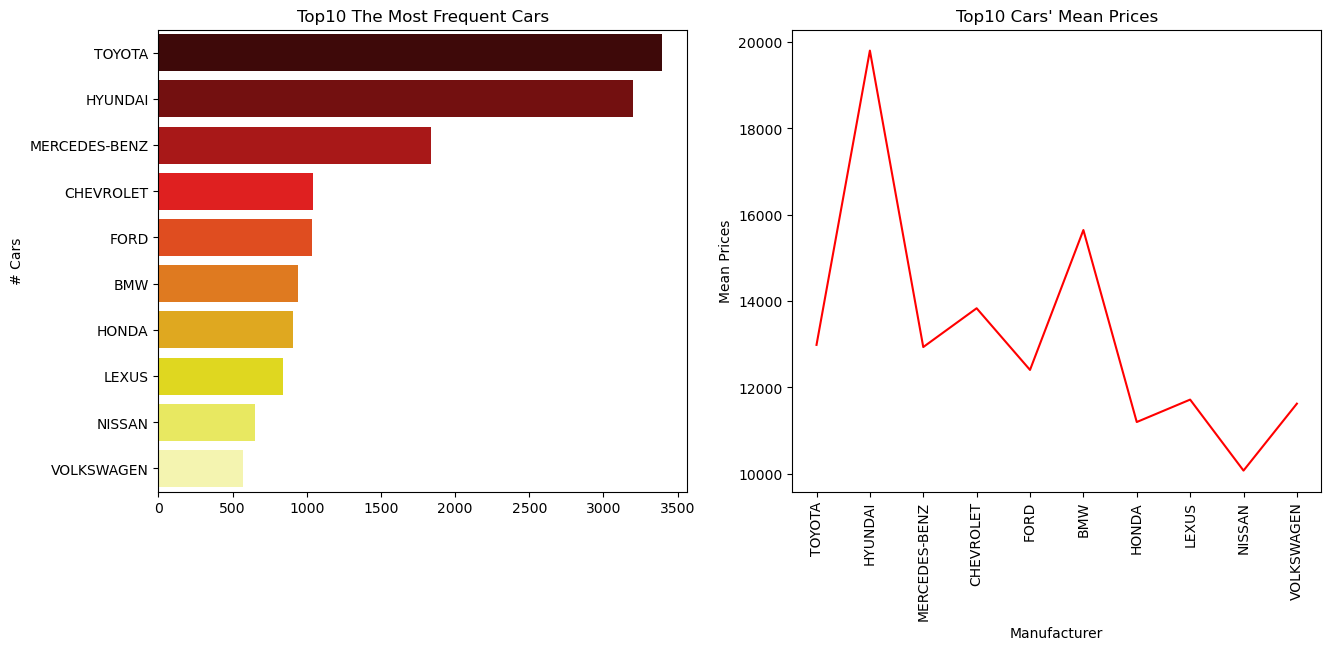

In [29]:
fig = plt.figure(figsize=(15,6))
ax = fig.add_subplot(121)
sns.barplot(x=top10cars.values, y=top10cars.index, palette='hot')
plt.ylabel('# Cars')
plt.title('Top10 The Most Frequent Cars')

ax2 = fig.add_subplot(122)
sns.lineplot(x=top10cars.index, y=top10meanprices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()

In [30]:
cars_cleaned.groupby("Doors")["Drive wheels"].value_counts()

Doors  Drive wheels
2      Rear              335
       Front             285
       4x4               103
4      Front           11528
       4x4              3440
       Rear             1723
5      Front              54
       Rear               30
       4x4                29
Name: count, dtype: int64

In [31]:
dd_val=np.array(cars_cleaned.groupby("Doors")["Drive wheels"].value_counts().values).reshape(3,3)

In [32]:
dd_sum=dd_val.sum(axis=1).reshape(3,1)
dd_sum=np.c_[dd_sum,dd_sum,dd_sum].flatten()
dd_sum

array([  723,   723,   723, 16691, 16691, 16691,   113,   113,   113],
      dtype=int64)

In [33]:
print((cars_cleaned.groupby("Doors")["Drive wheels"].value_counts()/dd_sum)*100)

Doors  Drive wheels
2      Rear            46.334716
       Front           39.419087
       4x4             14.246196
4      Front           69.067162
       4x4             20.609910
       Rear            10.322929
5      Front           47.787611
       Rear            26.548673
       4x4             25.663717
Name: count, dtype: float64


In [34]:
cars_cleaned.groupby("Drive wheels")["Price"].mean().sort_values(ascending=False)

Drive wheels
Front    14700.483441
Rear     13662.755268
4x4      12958.593505
Name: Price, dtype: float64

In [35]:
cars_cleaned.groupby("Gear box type")["Price"].median().sort_values(ascending=False)

Gear box type
Tiptronic    17876.0
Variator     13172.0
Automatic    11563.0
Manual        8781.0
Name: Price, dtype: float64

In [36]:
cars_cleaned.groupby("Color")["Price"].mean().sort_values(ascending=False)

Color
Yellow           16165.645833
Grey             15511.388683
White            14855.971142
Brown            14810.414201
Carnelian red    14742.733728
Orange           14695.240506
Beige            14418.140625
Black            14270.543848
Sky blue         13961.554622
Silver           13956.965266
Golden           13623.264286
Blue             12751.590000
Red              12338.672078
Green             9117.311475
Pink              8967.560000
Purple            8837.384615
Name: Price, dtype: float64

In [37]:
cars_cleaned.groupby("Turbo")["Price"].mean().sort_values(ascending=False)

Turbo
True     19731.140682
False    13652.378533
Name: Price, dtype: float64

In [38]:
cars_cleaned.groupby("Wheel")["Price"].mean().sort_values(ascending=False)

Wheel
Left wheel          14720.121833
Right-hand drive     8754.951503
Name: Price, dtype: float64

In [39]:
cars_cleaned.groupby("Fuel type")["Price"].mean().sort_values(ascending=False)

Fuel type
Plug-in Hybrid    22510.023810
Hydrogen          20385.000000
Diesel            20117.796719
LPG               13916.412975
Petrol            13567.058855
Hybrid            10397.230269
CNG                8588.345416
Name: Price, dtype: float64

In [40]:
cars_cleaned["Fuel type"].value_counts()

Fuel type
Petrol            9362
Diesel            3596
Hybrid            3383
LPG                632
CNG                469
Plug-in Hybrid      84
Hydrogen             1
Name: count, dtype: int64

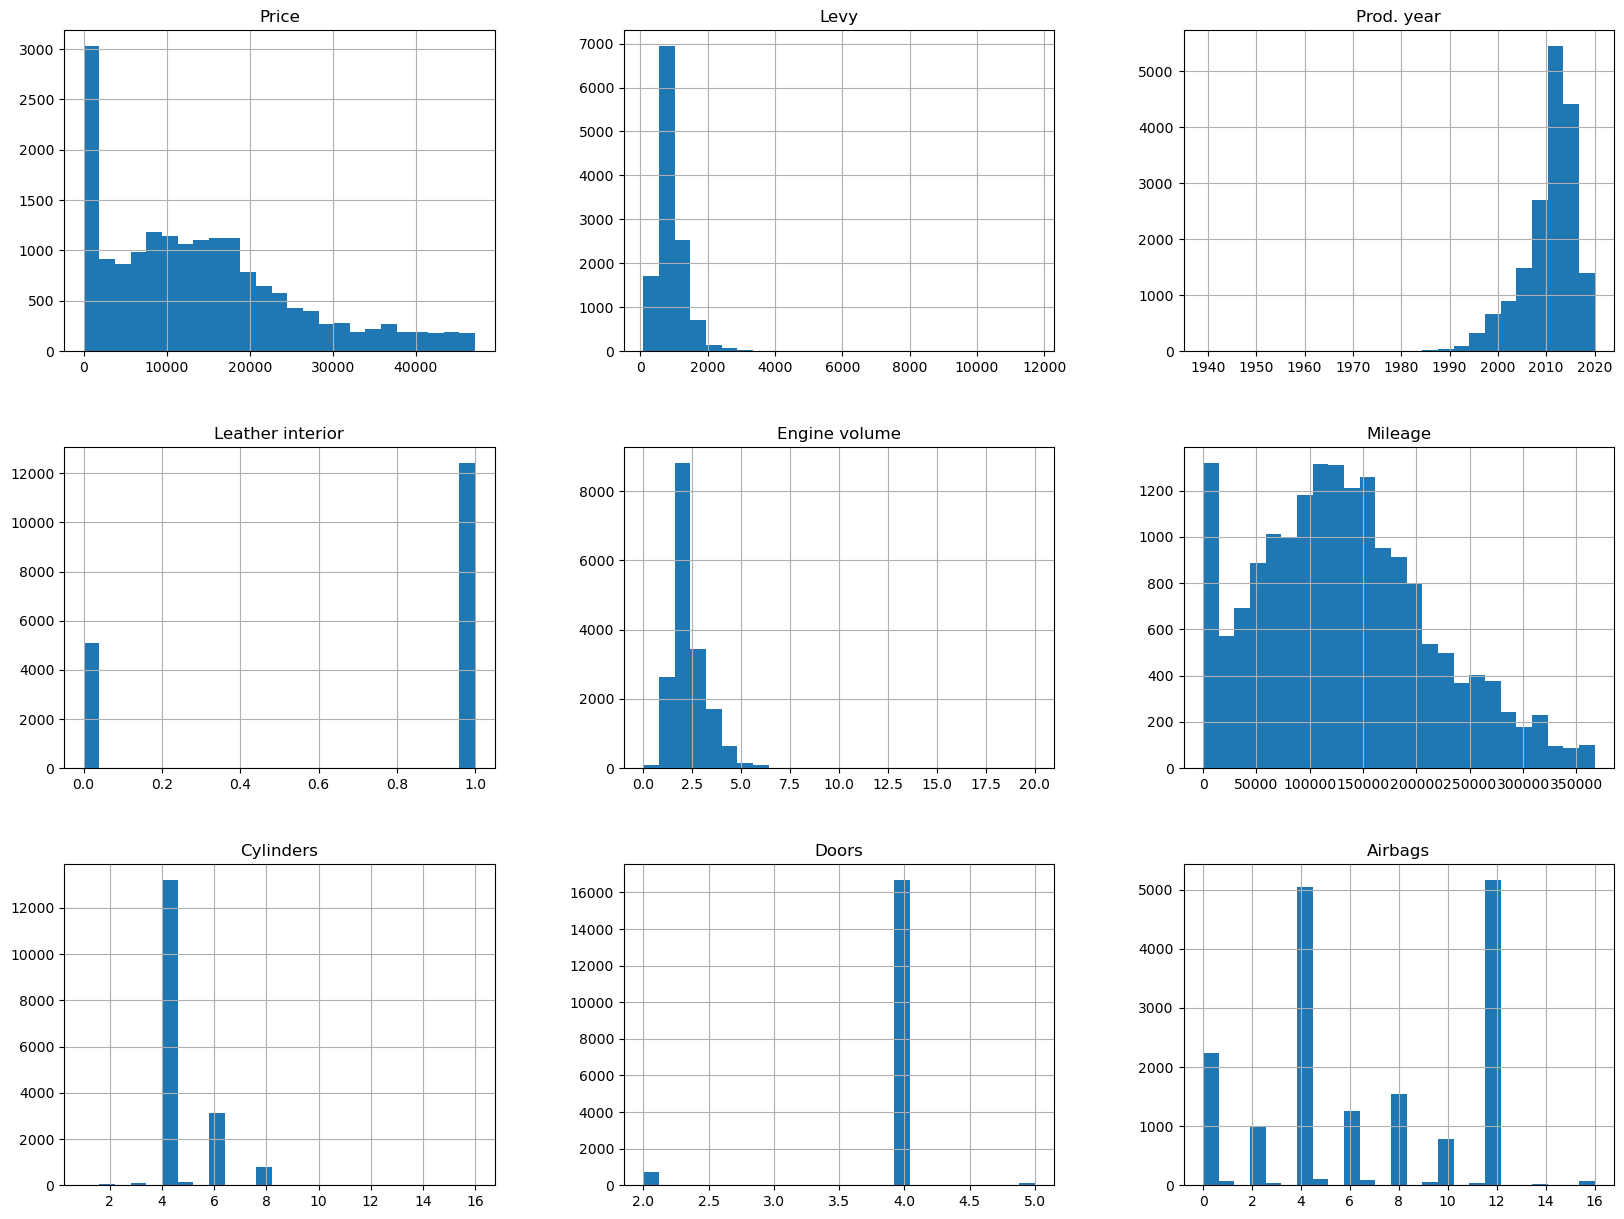

In [41]:
cars_cleaned.hist(bins=25,figsize=(20,15))
plt.show()

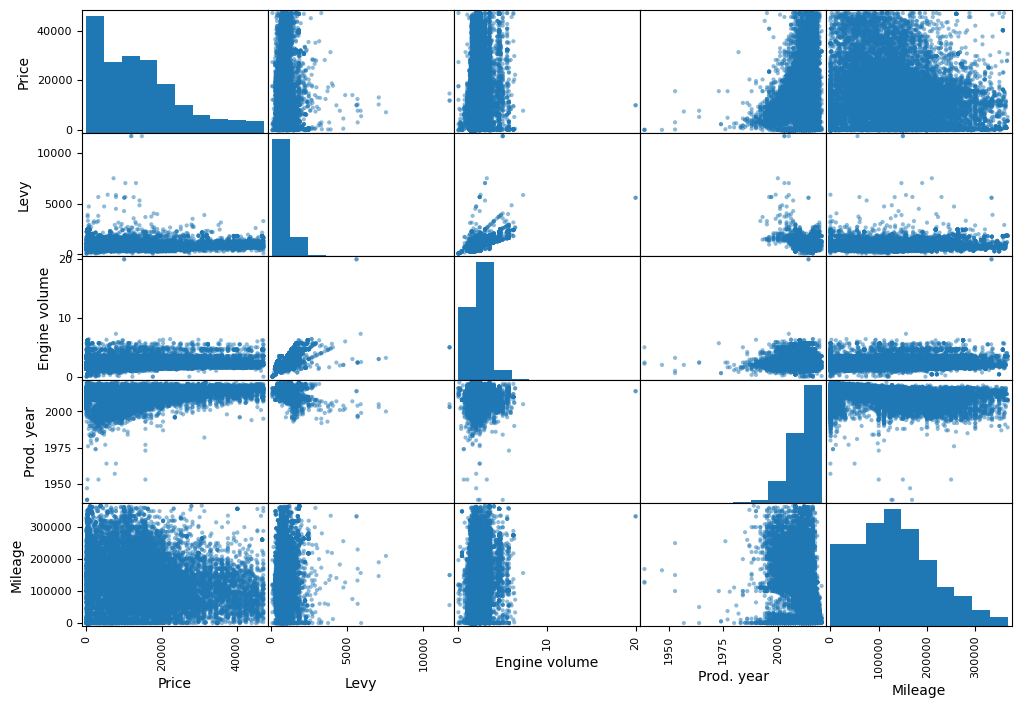

In [42]:
attributes=["Price","Levy","Engine volume","Prod. year","Mileage"]
scatter_matrix(cars_cleaned[attributes],figsize=(12,8))
plt.show()

- There ***positive correlation*** between ***Engine volume and Levy*** and ***slightly negative correlation*** between ***Levy and Prod. year***. Let's check the actual correlation scores between those attributes.

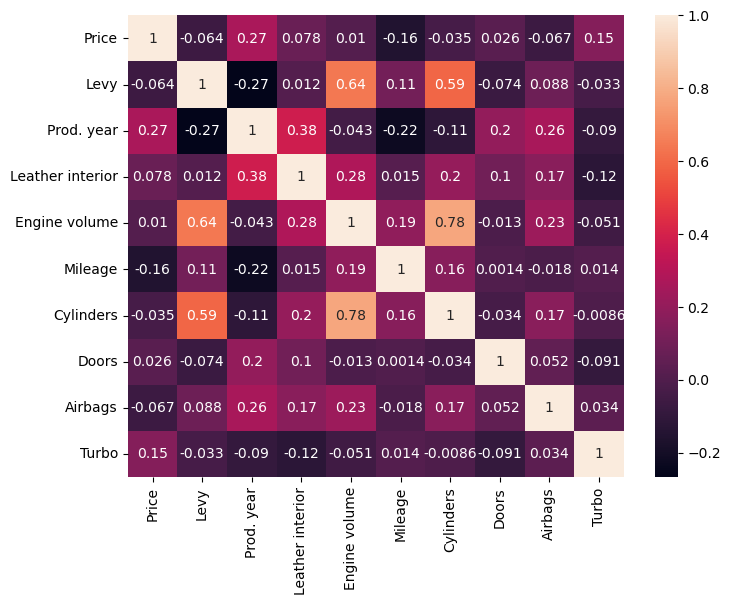

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(cars_cleaned.corr(numeric_only=True),annot=True)
plt.show()

In [45]:
cars_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17527 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17527 non-null  int64  
 1   Levy              12141 non-null  float64
 2   Manufacturer      17527 non-null  object 
 3   Model             17527 non-null  object 
 4   Prod. year        17527 non-null  int64  
 5   Category          17527 non-null  object 
 6   Leather interior  17527 non-null  int64  
 7   Fuel type         17527 non-null  object 
 8   Engine volume     17527 non-null  float64
 9   Mileage           17527 non-null  float64
 10  Cylinders         17527 non-null  float64
 11  Gear box type     17527 non-null  object 
 12  Drive wheels      17527 non-null  object 
 13  Doors             17527 non-null  int64  
 14  Wheel             17527 non-null  object 
 15  Color             17527 non-null  object 
 16  Airbags           17527 non-null  int64  
 17

In [46]:
num_attribs=["Levy","Prod. year","Engine volume","Mileage","Cylinders","Airbags"]
cat_attribs=['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type',
             'Drive wheels', 'Wheel', 'Color', 'Turbo']

In [47]:
num_cars=cars_cleaned[num_attribs]
cat_cars=cars_cleaned[cat_attribs]
y=cars_cleaned["Price"]

At very first stage we replaced ***'-'*** with ***NaN***s which was for ***Levy*** column. Time to handle with them. We will impute ***median*** values for that NaNs.(We don't have any other NaN value in another column so the following code just will impute them into the Levy but if your dataset has NaN's in the multiple column the code we will type will impute medians to each column seperately.)

In [48]:
Imputer = SimpleImputer(strategy='median')

Imputer.fit(num_cars)
# Displaying medians of every numveric column we have
display(Imputer.statistics_)
num_cars = Imputer.transform(num_cars)

array([7.79000e+02, 2.01200e+03, 2.00000e+00, 1.26265e+05, 4.00000e+00,
       6.00000e+00])

- Time to scale our numerical attributes! Scaling will help to our model to make better predictions and computation time will be less.

In [49]:
scaler = StandardScaler()
num_cars = scaler.fit_transform(num_cars)

- Let's put these 2 steps together to use them with one piece of code when we need them in the future.

In [50]:
num_pipeline=Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("Std_scaler",StandardScaler())])

Also we need to handle with the categorical columns because the machine learning model we will use expects only numerical values. So we will use one hot encoding, which will give 1 (Hot) the attribute is exist for that sample and 0 (Cold) for others and making full pipeline which will handle numerical values and categorical values at the same time)

In [51]:
full_pipeline=ColumnTransformer([
    ("num",num_pipeline,num_attribs),
    ("cat",OneHotEncoder(),cat_attribs)
])
cars_prepared=full_pipeline.fit_transform(cars_cleaned)

- Time to split our data for train and test, we will use %66 of them for train and %33 of them for test step.

In [52]:
Xtrain, Xtest, ytrain, ytest = train_test_split(cars_prepared, y, test_size=0.33, random_state = 123)

## Model Setup, Hyperparameter Tuning and Model Evaluation
<hr>

- This is a regression type problem so very first thing I want to try is Linear Regression.

In [53]:
lin_reg = LinearRegression()

lin_reg.fit(Xtrain, ytrain)

LinearRegression()

In [54]:
preds = lin_reg.predict(Xtrain)
lin_mse = mean_squared_error(ytrain, preds)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9217.021246411305

- We are approximately 9.2k away from actual prices which is not bad let's check MAE as well.

In [55]:
mae=mean_absolute_error(ytrain,preds)
mae

7130.939362756223

- The next algorithm I wanna try is decision tree, let's check how good it is with that problem.

In [56]:
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(Xtrain,ytrain)

DecisionTreeRegressor(random_state=42)

In [57]:
tree_preds = dtree.predict(Xtrain)
tree_mse = mean_squared_error(ytrain, tree_preds)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

995.1400359363548

Just 995??! Decision tree is really known to overfit so just checking rmse will not be enough to evaluate it let's check cross validation score for it.

In [58]:
scores = cross_val_score(dtree, Xtrain, ytrain, scoring='neg_mean_squared_error', cv=5)
print(scores)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores.mean()

[-57572480.51491214 -52817263.89253065 -60814815.09252536
 -55174470.97892837 -61539528.03255297]


7585.250529808824

- OK, the results seems more reasonable now. Our model is doing better than linear regression model.

In [59]:
lin_scores = cross_val_score(lin_reg, Xtrain, ytrain, scoring='neg_mean_squared_error', cv=5)
print(lin_scores)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores.mean()

[-80983801.71791594 -91867955.36968878 -87352352.30219854
 -82673935.62487122 -90692712.05834413]


9309.183669688018

- Another algorithm we will try is **Random Forest** which is ensemble model. This model relies on randomness, means that n_estimator times decision tree will be trained and the results will combined. (This model will take more time to train than others we tried before as you guess.)

In [60]:
rfr=RandomForestRegressor(n_estimators = 100, random_state=42)

rfr.fit(Xtrain, ytrain)

RandomForestRegressor(random_state=42)

In [61]:
forest_preds = rfr.predict(Xtrain)
forest_mse = mean_squared_error(ytrain, forest_preds)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2284.4290196484467

In [62]:
forest_scores = cross_val_score(rfr, Xtrain, ytrain,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores.mean()

5737.688686754339

- Random Forest is superior than other 2 algorithm so far so let's continue with this algorithm and tune the hyperparameters for it using GridSearchCV.

In [63]:
param_grid = [
    {'n_estimators': [100, 200], 'max_features': [35,33,31]},
  ]

rfr = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(rfr, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(Xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [35, 33, 31],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [64]:
grid_search.best_params_

{'max_features': 35, 'n_estimators': 200}

In [65]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5610.406485886762 {'max_features': 35, 'n_estimators': 100}
5595.665651660865 {'max_features': 35, 'n_estimators': 200}
5609.838594124255 {'max_features': 33, 'n_estimators': 100}
5605.184066086507 {'max_features': 33, 'n_estimators': 200}
5617.7757415039905 {'max_features': 31, 'n_estimators': 100}
5606.3316014933935 {'max_features': 31, 'n_estimators': 200}


In [66]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(Xtest)
final_mse = mean_squared_error(ytest, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5779.49929279868

In [67]:
feature_importance = grid_search.best_estimator_.feature_importances_
cat_encoder=full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = [i for cat in cat_encoder.categories_ for i in cat]
attributes = num_attribs + cat_one_hot_attribs
sorted(zip(feature_importance,attributes),reverse=True)

[(0.16122636478856203, 'Prod. year'),
 (0.11445431057185382, 'Mileage'),
 (0.10767112749994509, 'Airbags'),
 (0.07217699395239796, 'Levy'),
 (0.062404586251571074, 'Engine volume'),
 (0.054348928658062165, 'Diesel'),
 (0.03687997568345066, 'Tiptronic'),
 (0.02813964967989017, 'HYUNDAI'),
 (0.024364747665472072, 'Automatic'),
 (0.023638013629242775, 'SSANGYONG'),
 (0.019336442588033458, 'Cylinders'),
 (0.019128558040788668, 'Sedan'),
 (0.018652729028083417, 'Jeep'),
 (0.015623576479932996, 0),
 (0.015097760995873294, 'Front'),
 (0.014575577347516317, 1),
 (0.013140180982240006, True),
 (0.01279039754313398, False),
 (0.012482102468158082, 'TOYOTA'),
 (0.01095123804082578, 'Black'),
 (0.010932180662894288, 'Petrol'),
 (0.009987692215249727, 'White'),
 (0.009531914511990947, 'Hybrid'),
 (0.009162633612286253, '4x4'),
 (0.00886376992269274, 'Silver'),
 (0.007749716470818003, 'MERCEDES-BENZ'),
 (0.007048139219462411, 'Grey'),
 (0.0067099851258373994, 'LEXUS'),
 (0.005907137186411588, 'Rear'

- Production year, Mileage, No. of Airbags these 3 are features that play an important role in predictingthe cars resale price.

In [68]:
confidence = 0.95
squared_errors = (final_predictions - ytest) ** 2

In [69]:
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5524.5316499, 6023.6844373])